## Observations and Insights

1. There is almost an even split of male versus female test
2. While most drugs caused tumor volumes to increase with time, Capomulin and Ramicane were the only ones effective #at reducing or containing the tumor volumes
3. Capomulin was the most effective drug in reducing the average tumor size
4. There appears to be a strong linear correlation between weight and tumor volume

## Dependencies and starter code

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "MouseData.csv"
study_results = "MouseStudyResults.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

study_data.head(20)
study_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


summarystats = pd.DataFrame(study_data.groupby("Drug Regimen").count())



summarystats["Mean"] = pd.DataFrame(study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})

summarystats.head()











,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar plots

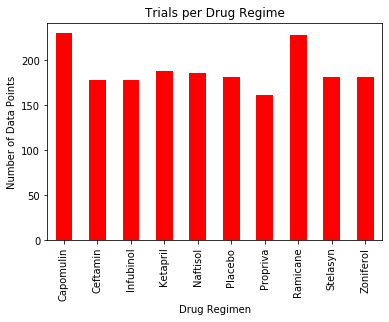

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


# Filter the DataFrame down only to those columns to chart
datapoints = summarystats[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="bar", color = "r", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regime")
plt.ylabel("Number of Data Points")
plt.show()
# plt.tight_layout()
plt.savefig('Data points by Drug')

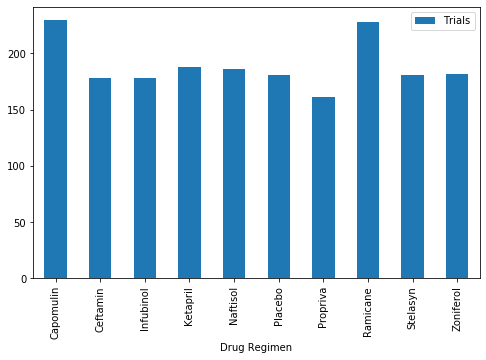

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

pyplot_datapoints = datapoints.plot(kind="bar", figsize=(8,5))

## Pie plots

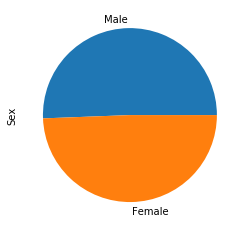

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_panda = study_data["Sex"].value_counts().plot.pie()


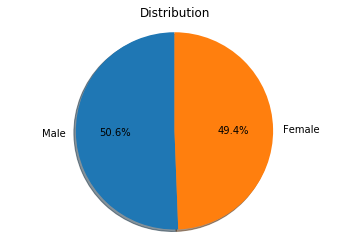

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution")
plt.pie(study_data["Sex"].value_counts(), autopct="%1.1f%%", shadow=True, startangle=90, labels=["Male","Female"])
plt.axis("equal")
plt.show()
plt.savefig('Demographics-Pie')

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

cap_df = study_data.loc[study_data["Drug Regimen"] == "Capomulin",:]
ram_df = study_data.loc[study_data["Drug Regimen"] == "Ramicane", :]
inf_df = study_data.loc[study_data["Drug Regimen"] == "Infubinol", :]
cef_df = study_data.loc[study_data["Drug Regimen"] == "Ceftamin", :]

##Capomulin
index_final = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_df_merged = pd.DataFrame(index_final)
cap_df_merged = pd.merge(cap_df, cap_df_merged, on=("Mouse ID","Timepoint"),how="right")
cap_df_merged.head(5)
cap_tum_vol = cap_df_merged["Tumor Volume (mm3)"]

quartiles = cap_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interquartile range of tumor volume is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could have final tumor volumnes below {lower_bound} or above {upper_bound}")

##Ramicane
index_final = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_df_merged = pd.DataFrame(index_final)
ram_df_merged = pd.merge(ram_df, ram_df_merged, on=("Mouse ID","Timepoint"),how="right")
ram_df_merged.head(5)
ram_tum_vol = ram_df_merged["Tumor Volume (mm3)"]

quartiles = ram_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interquartile range of tumor volume is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane potential outliers could have final tumor volumnes below {lower_bound} or above {upper_bound}")

##Infubinol
index_final = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_df_merged = pd.DataFrame(index_final)
inf_df_merged = pd.merge(inf_df, inf_df_merged, on=("Mouse ID","Timepoint"),how="right")
inf_df_merged.head(5)
inf_tum_vol = inf_df_merged["Tumor Volume (mm3)"]

quartiles = inf_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interquartile range of tumor volume is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol potential outliers could have final tumor volumnes below {lower_bound} or above {upper_bound}")

##Ceftamin
index_final = cef_df.groupby('Mouse ID').max()['Timepoint']
cef_df_merged = pd.DataFrame(index_final)
cef_df_merged = pd.merge(cef_df, cef_df_merged, on=("Mouse ID","Timepoint"))
cef_df_merged.head(5)
cef_tum_vol = cef_df_merged["Tumor Volume (mm3)"]

quartiles = cef_tum_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interquartile range of tumor volume is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin potential outliers could have final tumor volumnes below {lower_bound} or above {upper_bound}")

Capomulin potential outliers could have final tumor volumnes below 20.70456164999999 or above 51.83201549
Ramicane potential outliers could have final tumor volumnes below 17.912664470000003 or above 54.30681135
Infubinol potential outliers could have final tumor volumnes below 36.83290494999999 or above 82.74144559000001
Ceftamin potential outliers could have final tumor volumnes below 25.355449580000002 or above 87.66645829999999


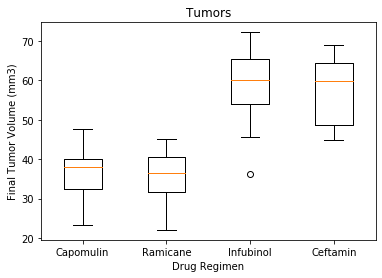

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot = [cap_tum_vol, ram_tum_vol, inf_tum_vol, cef_tum_vol]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(box_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('Final Tumor Volume by Drugs')
plt.show()

## Line and scatter plots

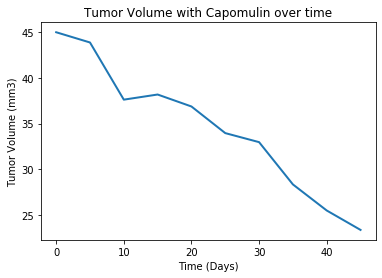

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df.head(20) 
plot_df = cap_df.loc[cap_df["Mouse ID"] == "s185",:]
plot_df
plt.title('Tumor Volume with Capomulin over time')
plt.plot(plot_df["Timepoint"], plot_df["Tumor Volume (mm3)"],linewidth=2, markersize=12)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('Tumor Volume Progression-s185')
plt.show()

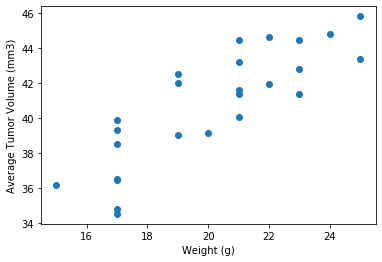

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg_df = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg_df['Weight (g)'],cap_avg_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('Avg Tumor Vol vs Weight-Capomulin')
plt.show()

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(cap_avg_df['Weight (g)'],cap_avg_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [ ]:
#Plot the linear regression model on top of the previous scatter plot.
x_values = cap_avg_df['Weight (g)']
y_values = cap_avg_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")
plt.savefig('Avg Tumor Vol vs Weight-Capomulin w regression')
plt.show()